Capstone Project Proposal: Diabetes Risk Prediction



Research Question:
Can survey questions from the Behavioral Risk Factor Surveillance System (BRFSS) provide accurate predictions of whether an individual has diabetes or is at high risk of developing diabetes?



Expected Data Source(s):
I will use the diabetes-related dataset from Kaggle, which includes survey data from the Behavioral Risk Factor Surveillance System (BRFSS) collected by the CDC in 2015. The dataset contains responses from 441,455 individuals and features 330 variables.

Link to Data: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data Links to an external site.


Techniques:
Data Preprocessing:
Data cleaning and handling missing values
Feature selection and engineering
Exploratory Data Analysis (EDA):
Statistical analysis and visualization of survey responses
Analysis of class distribution and imbalance
Modeling:
Logistic Regression
Decision Trees
Random Forests
Support Vector Machines (SVM)
Gradient Boosting
Evaluation:
Cross-validation
Performance metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC)
Interpretability:
Feature selection techniques to identify the most predictive questions.


Expected Results:
I expect to develop a predictive model that can accurately classify individuals into three categories: no diabetes, prediabetes, and diabetes. The model will identify key risk factors that are most predictive of diabetes risk, providing actionable insights for healthcare providers and public health officials.



Importance of the Question:
Diabetes is one of the most prevalent chronic diseases in the United States, affecting millions of people and placing a significant financial burden on the economy. Early diagnosis and risk assessment are crucial for preventing complications and improving patient outcomes. This question is important for several reasons:

Improved Patient Outcomes: Early detection allows for timely lifestyle changes and medical interventions, which can prevent or delay the onset of diabetes and its complications.
Cost Savings: Preventing diabetes can significantly reduce healthcare costs associated with the treatment of diabetes and its complications, such as heart disease, vision loss, and kidney disease.
Public Health Benefits: Identifying high-risk individuals enables public health officials to target interventions more effectively, improving overall population health and reducing the prevalence of diabetes.
Resource Optimization: Understanding the most predictive risk factors allows for the creation of shorter, more efficient screening tools that can be used in large-scale public health surveys and clinical settings.
If left unanswered, many individuals may remain unaware of their risk for diabetes, missing opportunities for early intervention and prevention. Our analysis can provide valuable insights that inform public health strategies and help healthcare providers offer more personalized care, ultimately improving the quality of life for millions of people and reducing the economic burden of diabetes.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import time

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Step 1: Load Data

filepath = '/content/drive/My Drive/ML/Capstone/data/diabetes_012_health_indicators_BRFSS2015.csv'
df = pd.read_csv(filepath)


In [ ]:
# Step 2: EDA

# Shape of the dataframe
print("Shape of the dataframe:", df.shape)

# Info about the dataframe
print("\nDataFrame Info:")
print(df.info())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary statistics of the dataframe:")
print(df.describe(include='all'))




Shape of the dataframe: (253680, 22)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14

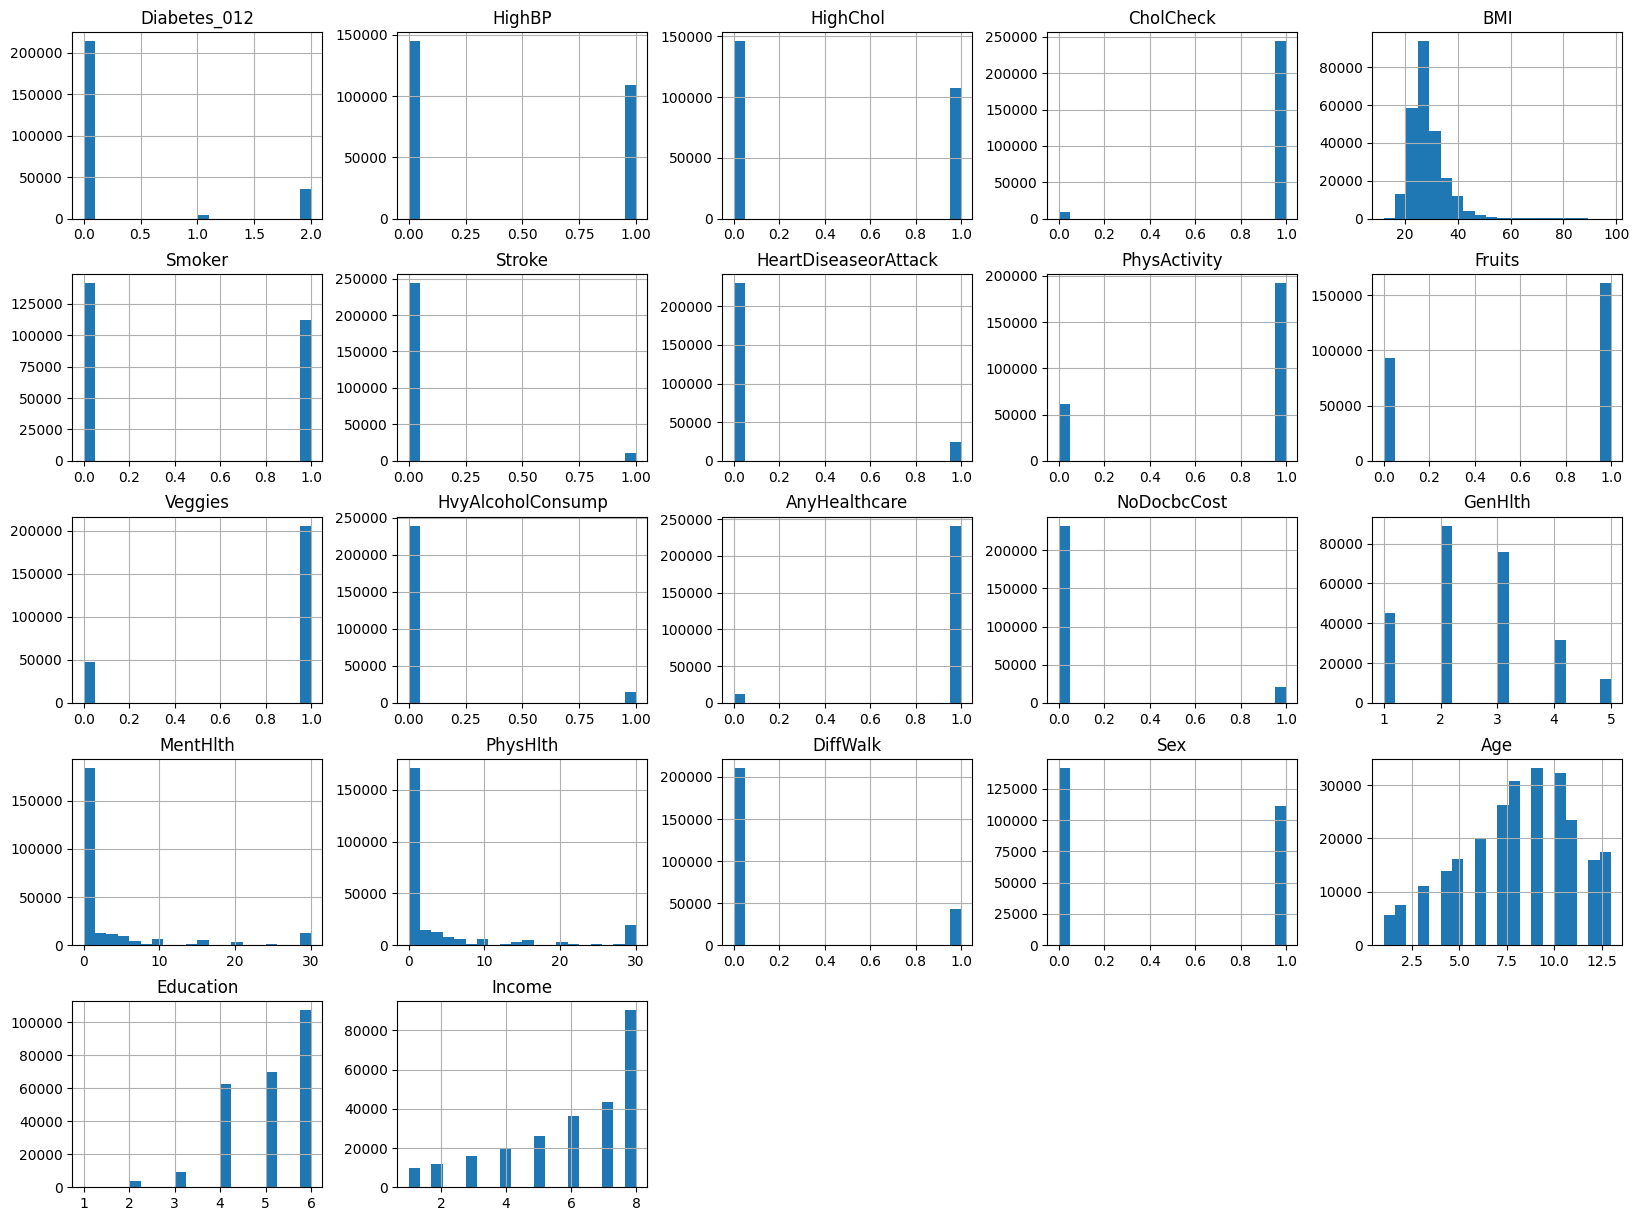

In [ ]:
# Data distributions
df.hist(bins=20, figsize=(20, 15))
plt.show()

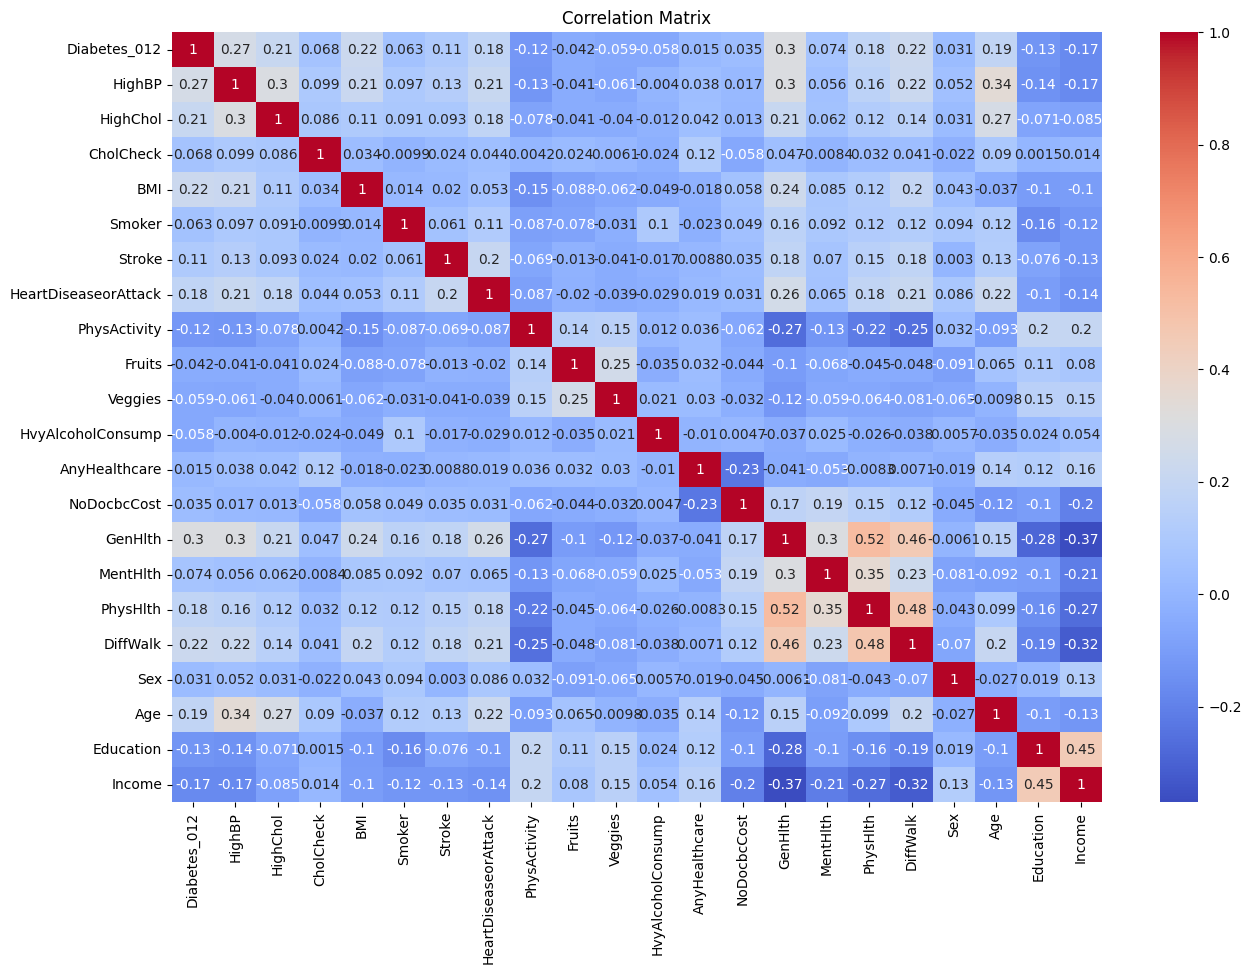

In [ ]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

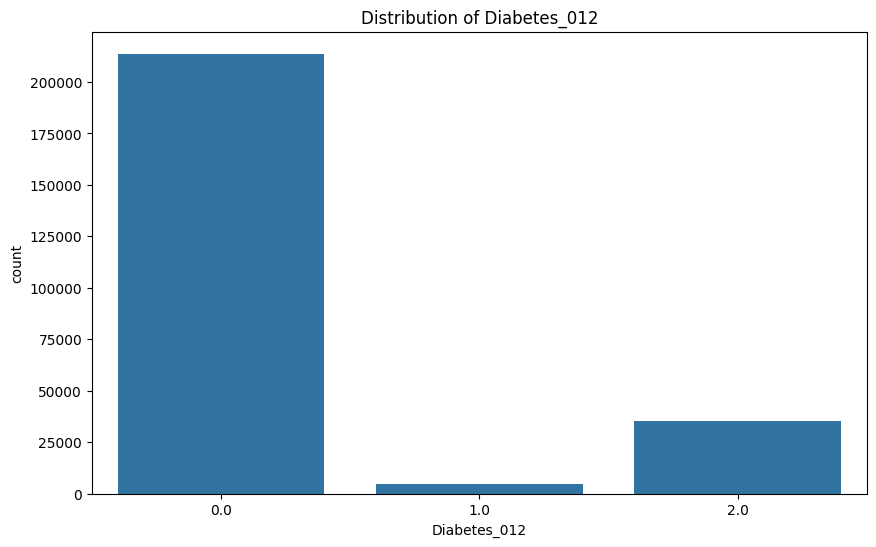

In [ ]:
# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='Diabetes_012', data=df)
plt.title("Distribution of Diabetes_012")
plt.show()

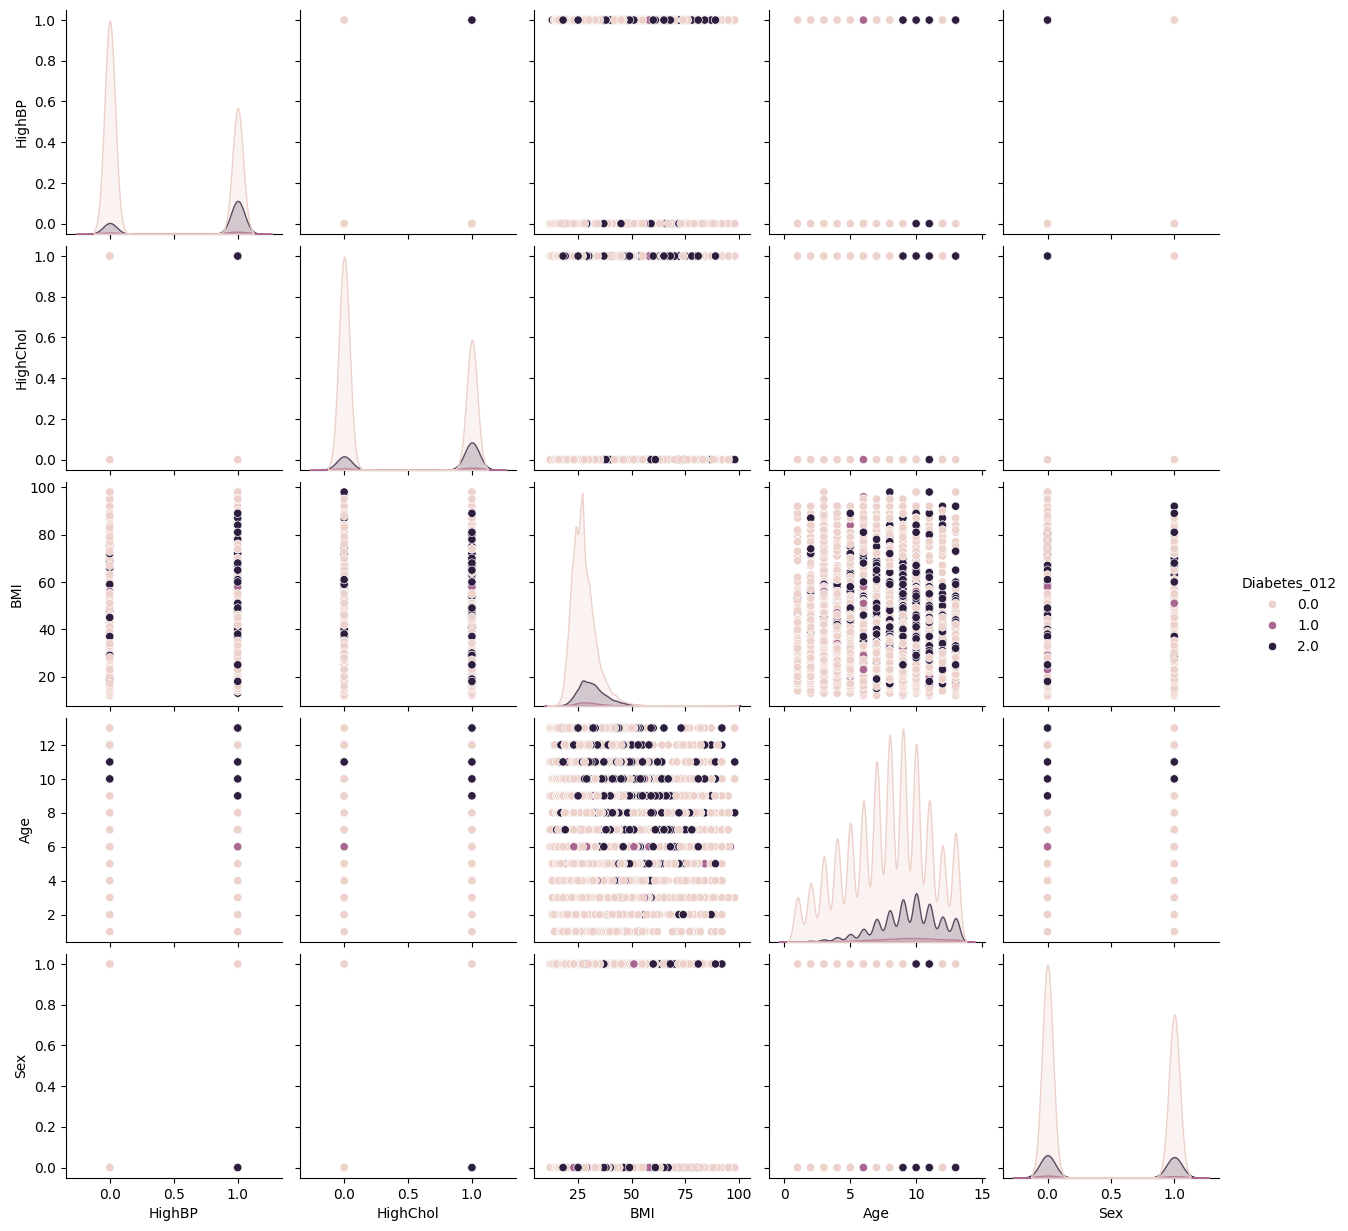

In [ ]:
# Pairplot for selected features
selected_features = ['Diabetes_012', 'HighBP', 'HighChol', 'BMI', 'Age', 'Sex']
sns.pairplot(df[selected_features], hue='Diabetes_012')
plt.show()

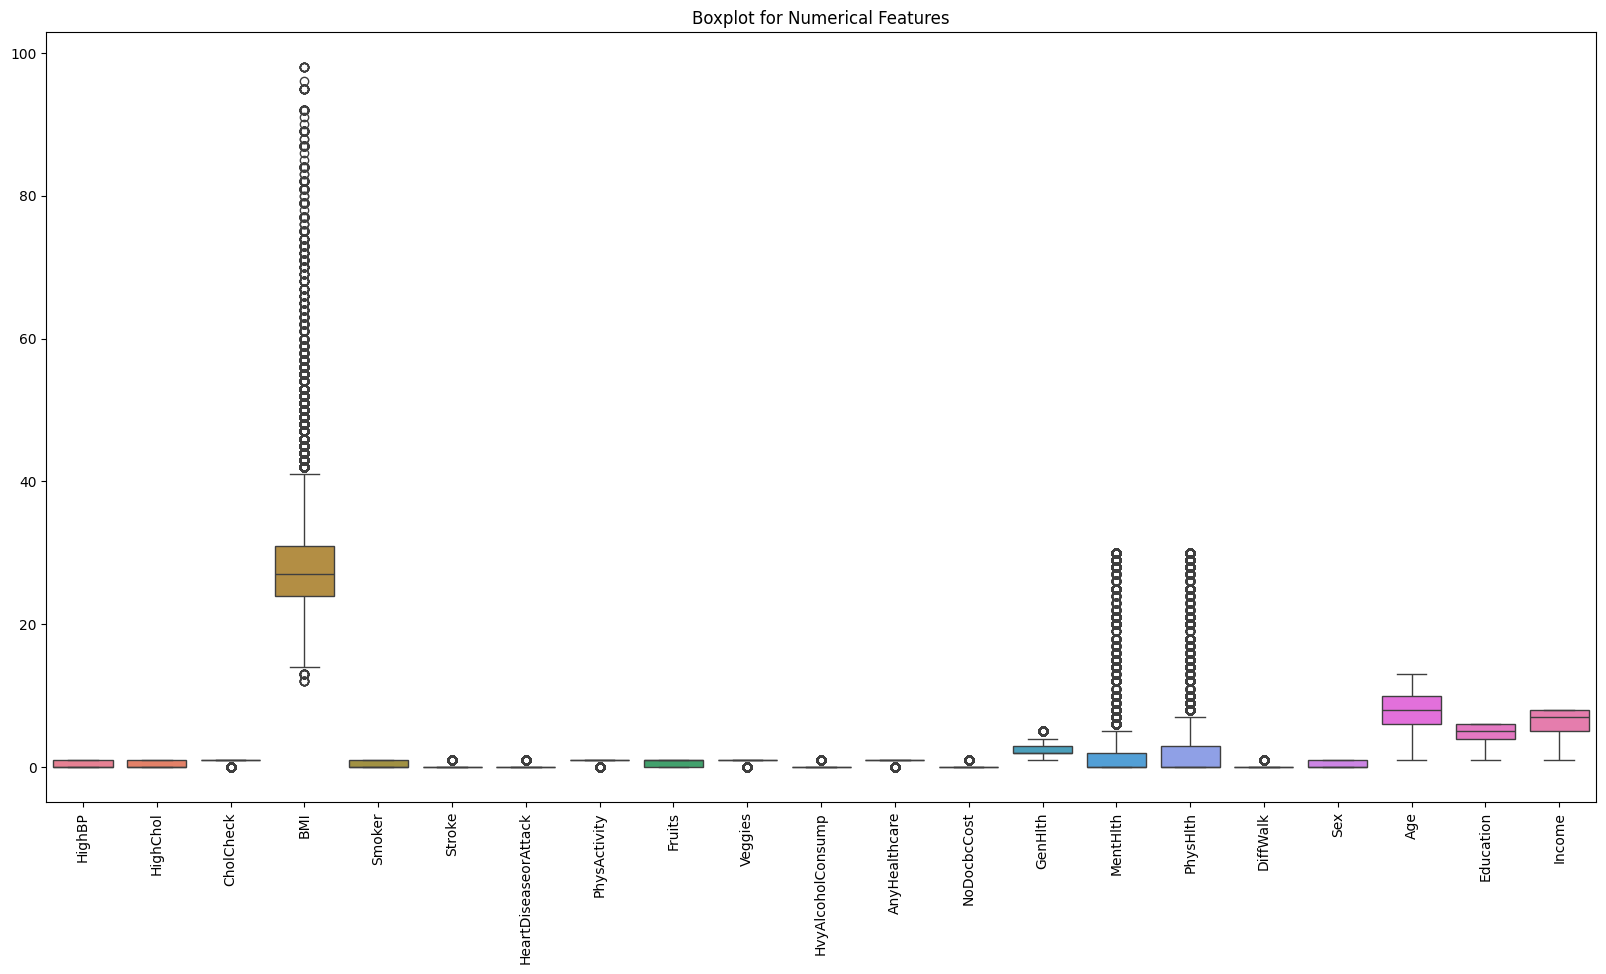

In [ ]:
# Boxplot for numerical features
plt.figure(figsize=(20, 10))
sns.boxplot(data=df.drop(columns=['Diabetes_012']))
plt.xticks(rotation=90)
plt.title("Boxplot for Numerical Features")
plt.show()

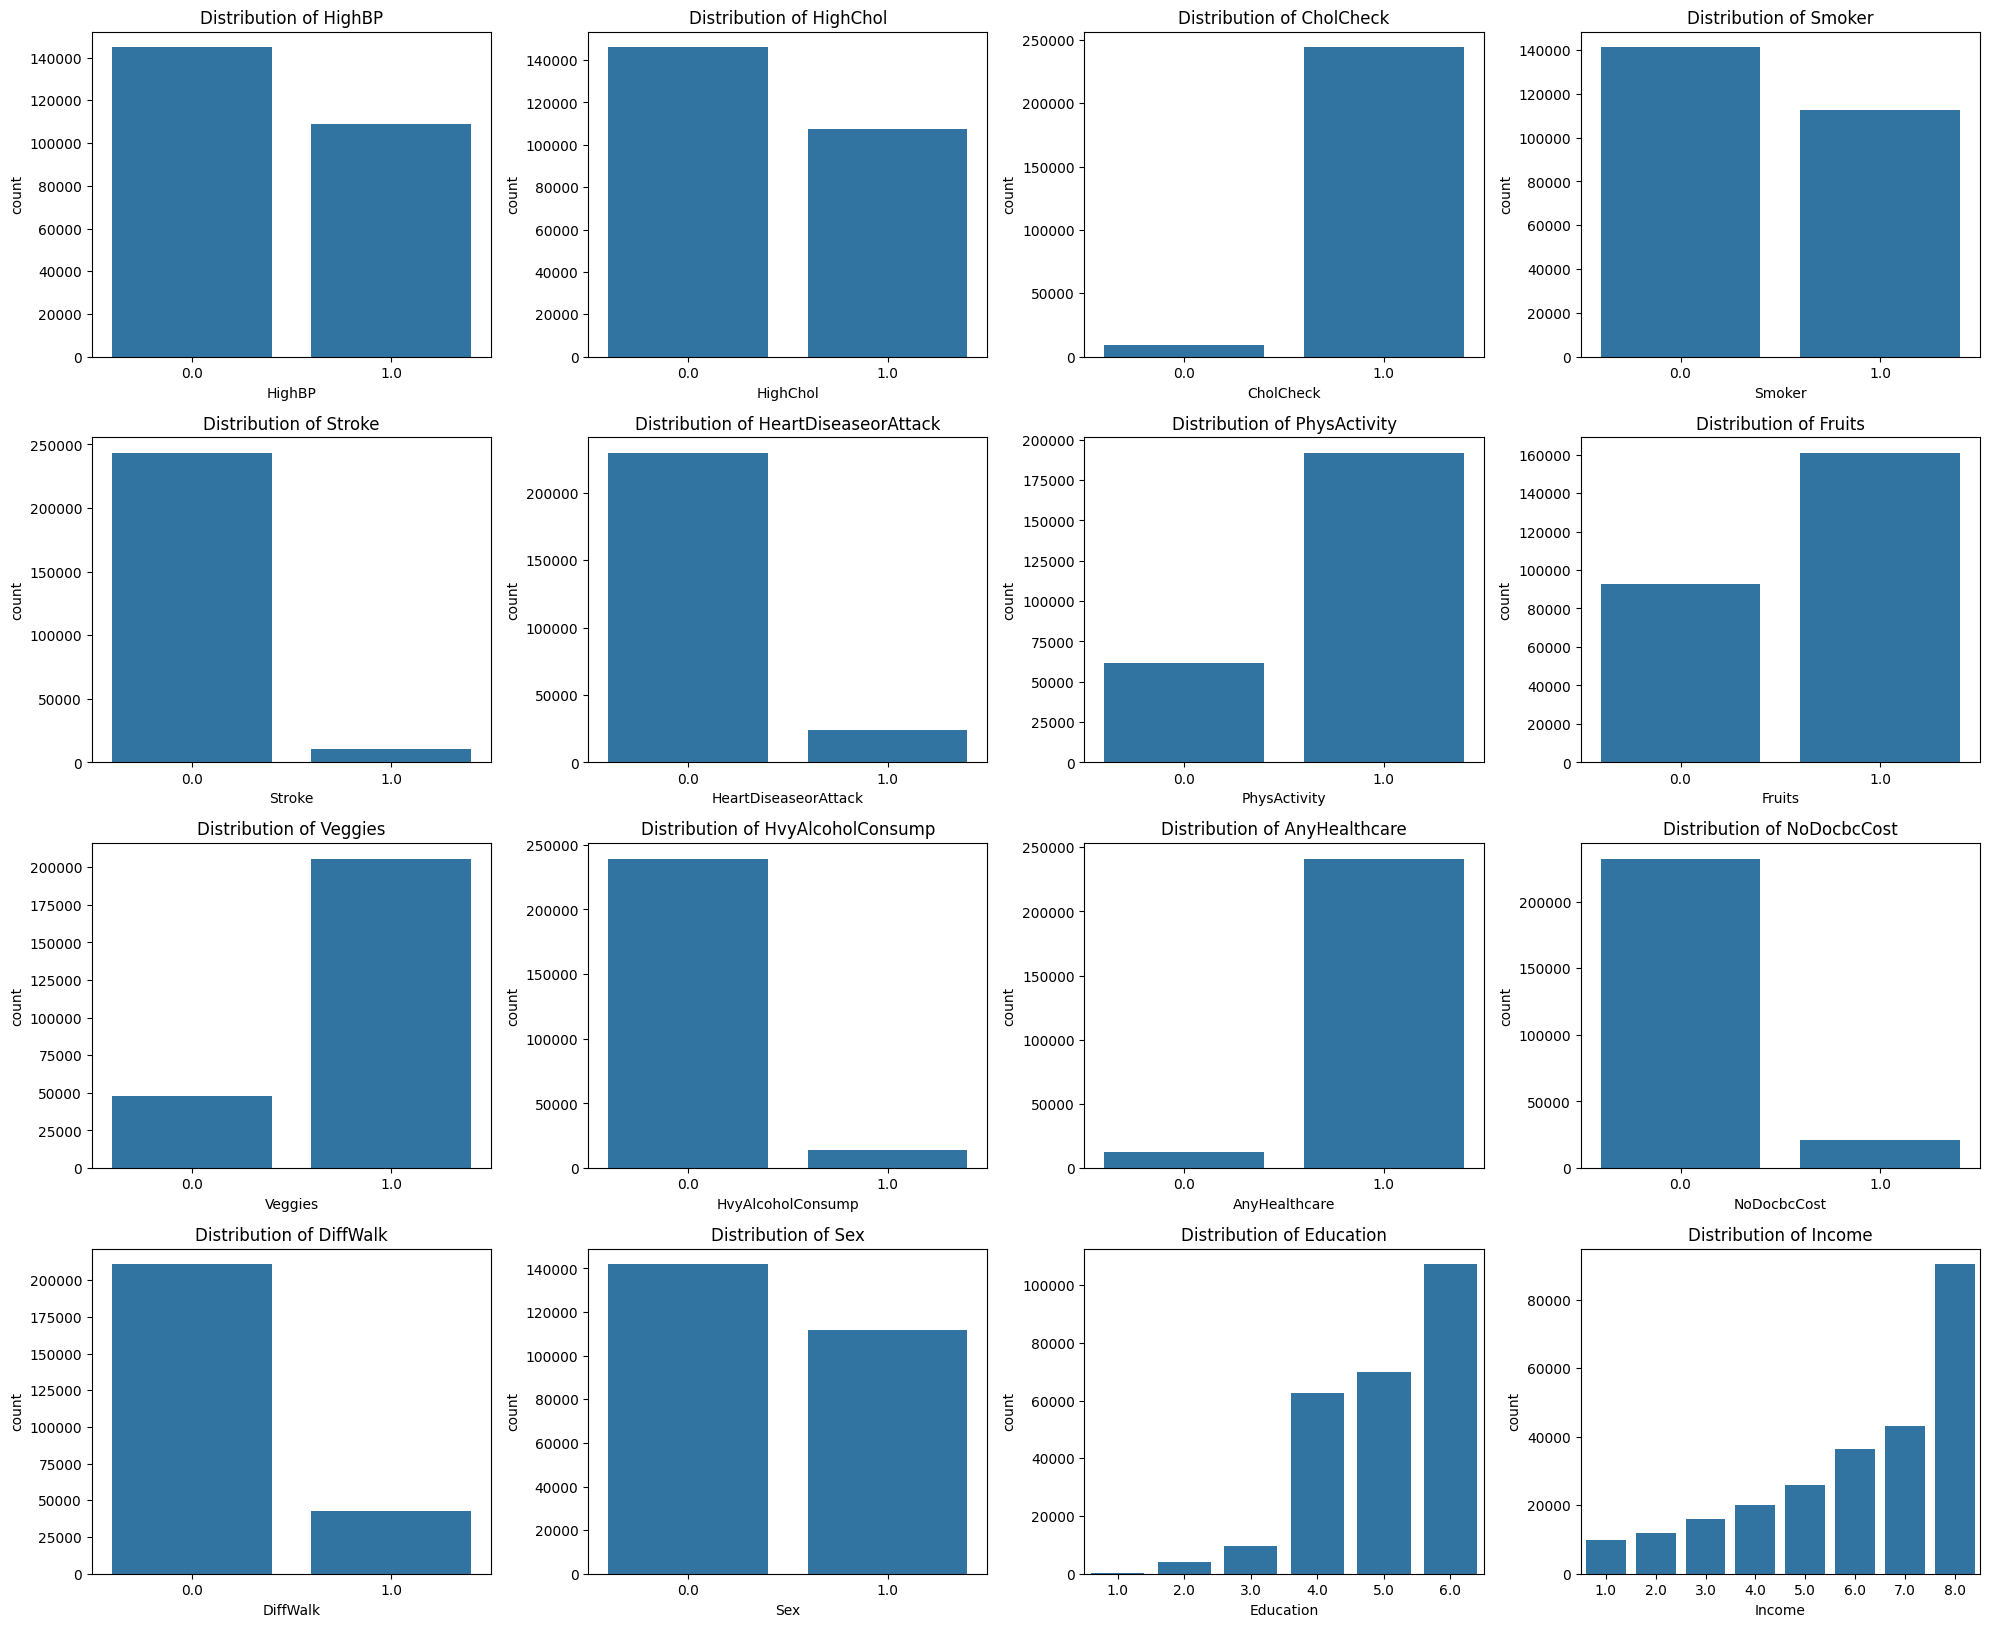

In [ ]:
# Bar plot for categorical features
categorical_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex', 'Education', 'Income']
plt.figure(figsize=(20, 20))
for i, feature in enumerate(categorical_features):
    plt.subplot(5, 4, i+1)
    sns.countplot(x=feature, data=df)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

In [7]:
# Step 3:  Data Preprocessing
# Splitting data into features and target
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']




In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Utility function for training and evaluating a model
def train_evaluate_model(model, X_train, X_test, y_train, y_test, param_grid=None):
    start_time = time.time()

    if param_grid:
        #grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        model = grid_search.best_estimator_
        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Grid Search Time: {time.time() - start_time:.4f} seconds")
    else:
        model.fit(X_train, y_train)
        print(f"Training Time: {time.time() - start_time:.4f} seconds")
    training_time = time.time() - start_time

    start_time = time.time()
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    prediction_time = time.time() - start_time

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    class_report = classification_report(y_test, y_pred)

    print(f"\nModel Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print(f"Tranning Time: {training_time:.4f} seconds")
    print(f"Prediction Time: {prediction_time:.4f} seconds")
    print("\nClassification Report:")
    print(class_report)



    return model, grid_search if param_grid else None


In [ ]:

# Logistic Regression
model_lr = LogisticRegression(max_iter=1000)
param_grid_lr = {'C': [0.1, 1, 10]}
model_lr, grid_lr = train_evaluate_model(model_lr, X_train, X_test, y_train, y_test, param_grid=param_grid_lr)
print(f"\nBest parameters for Logistic Regression: {grid_lr.best_params_}")

Best parameters: {'C': 1}
Grid Search Time: 6.6919 seconds

Model Performance:
Accuracy: 0.8457
Precision: 0.7981
Recall: 0.8457
F1-Score: 0.8073
ROC AUC Score: 0.7828
Tranning Time: 6.6932 seconds
Prediction Time: 0.0130 seconds

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.92     53426
         1.0       0.00      0.00      0.00      1158
         2.0       0.52      0.18      0.26      8836

    accuracy                           0.85     63420
   macro avg       0.46      0.38      0.39     63420
weighted avg       0.80      0.85      0.81     63420


Best parameters for Logistic Regression: {'C': 1}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Decision Tree
model_dt = DecisionTreeClassifier()
param_grid_dt = {'max_depth': [None, 10, 20]}
model_dt, grid_dt = train_evaluate_model(model_dt, X_train, X_test, y_train, y_test, param_grid=param_grid_dt)
print(f"\nBest parameters for Decision Tree: {grid_dt.best_params_}")

Best parameters: {'max_depth': 10}
Grid Search Time: 4.5875 seconds

Model Performance:
Accuracy: 0.8456
Precision: 0.8006
Recall: 0.8456
F1-Score: 0.8099
ROC AUC Score: 0.7619
Tranning Time: 4.5876 seconds
Prediction Time: 0.0186 seconds

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     53426
         1.0       0.05      0.00      0.00      1158
         2.0       0.51      0.19      0.28      8836

    accuracy                           0.85     63420
   macro avg       0.48      0.39      0.40     63420
weighted avg       0.80      0.85      0.81     63420


Best parameters for Decision Tree: {'max_depth': 10}


In [ ]:
# Random Forest
model_rf = RandomForestClassifier()
param_grid_rf = {'n_estimators': [100, 200, 300]}
model_rf, grid_rf = train_evaluate_model(model_rf, X_train, X_test, y_train, y_test, param_grid=param_grid_rf)
print(f"\nBest parameters for Random Forest: {grid_rf.best_params_}")


Best parameters: {'n_estimators': 300}
Grid Search Time: 270.1496 seconds

Model Performance:
Accuracy: 0.8433
Precision: 0.7969
Recall: 0.8433
F1-Score: 0.8079
ROC AUC Score: 0.7504
Tranning Time: 270.1496 seconds
Prediction Time: 11.5289 seconds

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     53426
         1.0       0.00      0.00      0.00      1158
         2.0       0.50      0.19      0.28      8836

    accuracy                           0.84     63420
   macro avg       0.45      0.39      0.40     63420
weighted avg       0.80      0.84      0.81     63420


Best parameters for Random Forest: {'n_estimators': 300}


In [ ]:
# SVM
model_svm = SVC(probability=True)
#param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
param_grid_svm = {'C': [0.1, 1, 10]}
model_svm, grid_svm = train_evaluate_model(model_svm, X_train, X_test, y_train, y_test, param_grid=param_grid_svm)
print(f"\nBest parameters for SVM: {grid_svm.best_params_}")

In [ ]:
model_svm = SVC(probability=True)

# Use RandomizedSearchCV for faster hyperparameter tuning
param_dist_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
random_search_svm = RandomizedSearchCV(model_svm, param_distributions=param_dist_svm, n_iter=10, cv=5, n_jobs=-1)

# Train and evaluate model
random_search_svm.fit(X_train_pca, y_train)
best_svm_model = random_search_svm.best_estimator_







In [ ]:
def train_evaluate_model_random(model, X_train, X_test, y_train, y_test, param_grid=None):
    start_time = time.time()

    if param_grid:
        #grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
        random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=3, n_jobs=-1, verbose=5, scoring='accuracy')
        random_search.fit(X_train, y_train)
        model = random_search.best_estimator_
        print(f"Best parameters: {random_search.best_params_}")
        print(f"Random Search Time: {time.time() - start_time:.4f} seconds")
    else:
        model.fit(X_train, y_train)
        print(f"Training Time: {time.time() - start_time:.4f} seconds")
    training_time = time.time() - start_time

    start_time = time.time()
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    prediction_time = time.time() - start_time

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    class_report = classification_report(y_test, y_pred)

    print(f"\nModel Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print(f"Tranning Time: {training_time:.4f} seconds")
    print(f"Prediction Time: {prediction_time:.4f} seconds")
    print("\nClassification Report:")
    print(class_report)



    return model, random_search if param_grid else None


In [ ]:
# SVM
model_svm = SVC(probability=True)
#param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
param_grid_svm = {'C': [0.1, 1, 10]}
model_svm, grid_svm = train_evaluate_model_random(model_svm, X_train, X_test, y_train, y_test, param_grid=param_grid_svm)
print(f"\nBest parameters for SVM: {grid_svm.best_params_}")

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [9]:
def train_evaluate_model_svm(model, X_train, X_test, y_train, y_test, param_grid=None):
    start_time = time.time()

    if param_grid:
        print("Grid search is not being used in this function.")
        return

    # Train the model
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    print(f"Training Time: {training_time:.4f} seconds")

    # Prediction
    start_time = time.time()
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    prediction_time = time.time() - start_time

    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    class_report = classification_report(y_test, y_pred)

    # Print results
    print(f"\nModel Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print(f"Training Time: {training_time:.4f} seconds")
    print(f"Prediction Time: {prediction_time:.4f} seconds")
    print("\nClassification Report:")
    print(class_report)



In [ ]:
# Example usage
model_svm = SVC(probability=True, C=1, kernel='rbf')  # Specify hyperparameters as needed
train_evaluate_model_svm(model_svm, X_train, X_test, y_train, y_test)